In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 

In [2]:
matches = pd.read_csv("matches.csv", index_col=0)

In [3]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,Match Report,NaN,13.0,1.0,17.8,0.0,0,0,2023,Liverpool
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,Match Report,NaN,25.0,9.0,16.8,1.0,0,1,2023,Liverpool
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,Match Report,NaN,9.0,4.0,17.2,1.0,0,0,2023,Liverpool
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,Match Report,NaN,17.0,4.0,14.7,0.0,0,0,2023,Liverpool
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,Match Report,NaN,16.0,5.0,15.8,0.0,0,0,2023,Liverpool


In [4]:
matches.shape

(492, 27)

In [5]:
#get total = 2 seasons x 20 squads x 38 matches
2 * 20 * 38

1520

In [6]:
matches["team"].value_counts()

Arsenal                     59
Manchester City             58
Liverpool                   21
Newcastle United            21
Burnley                     21
Everton                     21
Nottingham Forest           21
Crystal Palace              21
Fulham                      21
Wolverhampton Wanderers     21
Chelsea                     21
Manchester United           21
Brighton and Hove Albion    21
West Ham United             21
Tottenham Hotspur           21
Aston Villa                 21
Sheffield United            21
Bournemouth                 20
Brentford                   20
Luton Town                  20
Name: team, dtype: int64

In [7]:
matches[matches["team"] == "Liverpool"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,Match Report,NaN,13.0,1.0,17.8,0.0,0,0,2023,Liverpool
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,Match Report,NaN,25.0,9.0,16.8,1.0,0,1,2023,Liverpool
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,Match Report,NaN,9.0,4.0,17.2,1.0,0,0,2023,Liverpool
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,Match Report,NaN,17.0,4.0,14.7,0.0,0,0,2023,Liverpool
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,Match Report,NaN,16.0,5.0,15.8,0.0,0,0,2023,Liverpool
6,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,W,3.0,1.0,West Ham,...,Match Report,NaN,21.0,6.0,19.3,2.0,1,1,2023,Liverpool
8,2023-09-30,17:30,Premier League,Matchweek 7,Sat,Away,L,1.0,2.0,Tottenham,...,Match Report,NaN,12.0,4.0,14.9,0.0,0,0,2023,Liverpool
10,2023-10-08,14:00,Premier League,Matchweek 8,Sun,Away,D,2.0,2.0,Brighton,...,Match Report,NaN,13.0,3.0,18.8,0.0,1,1,2023,Liverpool
11,2023-10-21,12:30,Premier League,Matchweek 9,Sat,Home,W,2.0,0.0,Everton,...,Match Report,NaN,25.0,5.0,22.4,1.0,1,1,2023,Liverpool
13,2023-10-29,14:00,Premier League,Matchweek 10,Sun,Home,W,3.0,0.0,Nott'ham Forest,...,Match Report,NaN,21.0,8.0,19.5,2.0,0,0,2023,Liverpool


In [8]:
matches["round"].value_counts()

Matchweek 1     22
Matchweek 11    22
Matchweek 21    22
Matchweek 2     22
Matchweek 19    22
Matchweek 16    22
Matchweek 15    22
Matchweek 14    22
Matchweek 13    22
Matchweek 12    22
Matchweek 20    22
Matchweek 10    22
Matchweek 5     22
Matchweek 9     22
Matchweek 4     22
Matchweek 3     22
Matchweek 6     22
Matchweek 7     22
Matchweek 8     22
Matchweek 17    20
Matchweek 18    20
Matchweek 31     2
Matchweek 32     2
Matchweek 37     2
Matchweek 36     2
Matchweek 35     2
Matchweek 28     2
Matchweek 34     2
Matchweek 33     2
Matchweek 25     2
Matchweek 30     2
Matchweek 29     2
Matchweek 27     2
Matchweek 26     2
Matchweek 24     2
Matchweek 23     2
Matchweek 22     2
Matchweek 38     2
Name: round, dtype: int64

In [9]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [10]:
del matches["comp"]

In [11]:
del matches["notes"]

In [12]:
matches["date"] = pd.to_datetime(matches["date"])

In [13]:
matches["target"] = (matches["result"] == "W").astype("int")

In [14]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,sh,sot,dist,fk,pk,pkatt,season,team,target
0,2023-08-13,16:30,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,1.3,...,Match Report,13.0,1.0,17.8,0.0,0,0,2023,Liverpool,0
1,2023-08-19,15:00,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,3.0,...,Match Report,25.0,9.0,16.8,1.0,0,1,2023,Liverpool,1
2,2023-08-27,16:30,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,...,Match Report,9.0,4.0,17.2,1.0,0,0,2023,Liverpool,1
3,2023-09-03,14:00,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,2.5,...,Match Report,17.0,4.0,14.7,0.0,0,0,2023,Liverpool,1
4,2023-09-16,12:30,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,2.5,...,Match Report,16.0,5.0,15.8,0.0,0,0,2023,Liverpool,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2023-05-02,20:00,Matchweek 34,Tue,Home,W,3.0,1.0,Chelsea,1.7,...,Match Report,16.0,9.0,13.0,0.0,0,0,2022,Arsenal,1
45,2023-05-07,16:30,Matchweek 35,Sun,Away,W,2.0,0.0,Newcastle Utd,1.3,...,Match Report,10.0,6.0,16.6,0.0,0,0,2022,Arsenal,1
46,2023-05-14,16:30,Matchweek 36,Sun,Home,L,0.0,3.0,Brighton,0.9,...,Match Report,14.0,2.0,16.4,0.0,0,0,2022,Arsenal,0
47,2023-05-20,17:30,Matchweek 37,Sat,Away,L,0.0,1.0,Nott'ham Forest,0.6,...,Match Report,11.0,3.0,16.4,0.0,0,0,2022,Arsenal,0


In [15]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [16]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [17]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [18]:
matches["day_code"] = matches["date"].dt.dayofweek

In [19]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
0,2023-08-13,16:30,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,1.3,...,0.0,0,0,2023,Liverpool,0,0,6,16,6
1,2023-08-19,15:00,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,3.0,...,1.0,0,1,2023,Liverpool,1,1,2,15,5
2,2023-08-27,16:30,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,...,1.0,0,0,2023,Liverpool,1,0,16,16,6
3,2023-09-03,14:00,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,2.5,...,0.0,0,0,2023,Liverpool,1,1,1,14,6
4,2023-09-16,12:30,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,2.5,...,0.0,0,0,2023,Liverpool,1,0,22,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2023-05-02,20:00,Matchweek 34,Tue,Home,W,3.0,1.0,Chelsea,1.7,...,0.0,0,0,2022,Arsenal,1,1,6,20,1
45,2023-05-07,16:30,Matchweek 35,Sun,Away,W,2.0,0.0,Newcastle Utd,1.3,...,0.0,0,0,2022,Arsenal,1,0,16,16,6
46,2023-05-14,16:30,Matchweek 36,Sun,Home,L,0.0,3.0,Brighton,0.9,...,0.0,0,0,2022,Arsenal,0,1,4,16,6
47,2023-05-20,17:30,Matchweek 37,Sat,Away,L,0.0,1.0,Nott'ham Forest,0.6,...,0.0,0,0,2022,Arsenal,0,0,17,17,5


## Create multiple trees using different random subsets of data

In [20]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

### Train model and predict

In [21]:
train = matches[matches["date"] < '2024-01-01']

In [22]:
test = matches[matches["date"] > '2024-01-01']

In [23]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [24]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [25]:
preds = rf.predict(test[predictors])

### Test error rate/accuracy of model

In [26]:
error = accuracy_score(test["target"], preds)

In [27]:
error

0.5

In [28]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

In [29]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,10,7
1,4,1


In [30]:
precision_score(test["target"], preds)

0.125

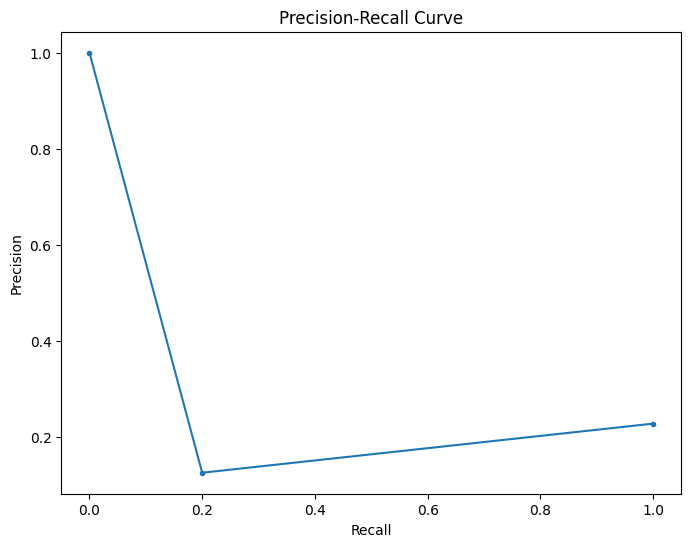

In [31]:
precision, recall, _ = precision_recall_curve(test["target"], preds)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve (Illustrate model's performance metrics)

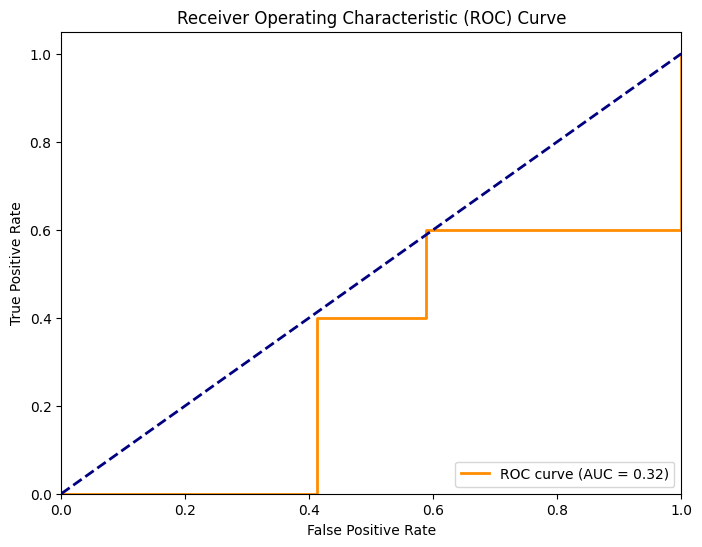

In [32]:
fpr, tpr, thresholds = roc_curve(test["target"], rf.predict_proba(test[predictors])[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
grouped_matches = matches.groupby("team")

In [34]:
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [35]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [36]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,15,5,3.000000,1.000000,17.666667,6.000000,17.466667,0.666667,0.333333,0.333333
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,19,2,3.666667,1.666667,19.333333,7.333333,15.933333,0.333333,0.000000,0.000000
6,2022-09-03,17:30,Matchweek 6,Sat,Away,D,1.0,1.0,Aston Villa,2.1,...,17,5,4.333333,1.666667,18.666667,8.000000,15.033333,0.333333,0.000000,0.000000
9,2022-09-17,12:30,Matchweek 8,Sat,Away,W,3.0,0.0,Wolves,1.1,...,12,5,3.666667,1.000000,16.000000,6.000000,15.233333,0.333333,0.000000,0.000000
10,2022-10-02,14:00,Matchweek 9,Sun,Home,W,6.0,3.0,Manchester Utd,3.2,...,14,6,3.333333,0.333333,15.333333,6.666667,17.000000,0.333333,0.000000,0.000000
12,2022-10-08,15:00,Matchweek 10,Sat,Home,W,4.0,0.0,Southampton,2.4,...,15,5,3.333333,1.333333,17.000000,6.666667,16.800000,0.666667,0.000000,0.000000
14,2022-10-16,16:30,Matchweek 11,Sun,Away,L,0.0,1.0,Liverpool,1.0,...,16,6,4.333333,1.000000,19.666667,8.000000,15.833333,0.333333,0.000000,0.000000
15,2022-10-22,15:00,Matchweek 13,Sat,Home,W,3.0,1.0,Brighton,1.6,...,15,5,3.333333,1.333333,19.666667,7.666667,15.500000,0.333333,0.000000,0.000000
17,2022-10-29,12:30,Matchweek 14,Sat,Away,W,1.0,0.0,Leicester City,1.0,...,12,5,2.333333,0.666667,15.333333,5.666667,15.766667,0.000000,0.333333,0.333333
19,2022-11-05,15:00,Matchweek 15,Sat,Home,W,2.0,1.0,Fulham,2.1,...,15,5,1.333333,0.666667,13.333333,4.666667,18.066667,0.333333,0.333333,0.333333


In [37]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [38]:
matches_rolling

date   time         round  day venue result  \
team                                                                           
Arsenal                 3  2022-08-27  17:30   Matchweek 4  Sat  Home      W   
                        4  2022-08-31  19:30   Matchweek 5  Wed  Home      W   
                        5  2022-09-04  16:30   Matchweek 6  Sun  Away      L   
                        7  2022-09-18  12:00   Matchweek 8  Sun  Away      W   
                        8  2022-10-01  12:30   Matchweek 9  Sat  Home      W   
...                               ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 18 2023-12-17  14:00  Matchweek 17  Sun  Away      L   
                        19 2023-12-24  13:00  Matchweek 18  Sun  Home      W   
                        20 2023-12-27  19:30  Matchweek 19  Wed  Away      W   
                        21 2023-12-30  15:00  Matchweek 20  Sat  Home      W   
                        24 2024-01-22  19:45  Matchweek 21  Mon  Away      D   

                             gf   ga        opponent   xg  ...  hour  \
team                                                       ...         
Arsenal                 3   2.0  1.0          Fulham  2.6  ...    17   
                        4   2.0  1.0     Aston Villa  2.4  ...    19   
                        5   1.0  3.0  Manchester Utd  1.3  ...    16   
                        7   3.0  0.0       Brentford  1.5  ...    12   
                        8   3.0  1.0       Tottenham  2.4  ...    12   
...                         ...  ...             ...  ...  ...   ...   
Wolverhampton Wanderers 18  0.0  3.0        West Ham  0.7  ...    14   
                        19  2.0  1.0         Chelsea  1.3  ...    13   
                        20  4.0  1.0       Brentford  2.4  ...    19   
                        21  3.0  0.0         Everton  1.9  ...    15   
                        24  0.0  0.0        Brighton  1.1  ...    19   

                            day_code  gf_rolling ga_rolling sh_rolling  \
team                                                                     
Arsenal                 3          5    3.000000   0.666667  14.333333   
                        4          2    3.000000   1.000000  18.333333   
                        5          6    2.333333   0.666667  19.333333   
                        7          6    1.666667   1.666667  20.000000   
                        8          5    2.000000   1.333333  17.000000   
...                              ...         ...        ...        ...   
Wolverhampton Wanderers 18         6    1.000000   1.000000   7.666667   
                        19         6    0.666667   1.333333  10.333333   
                        20         2    1.000000   1.666667  12.666667   
                        21         5    2.000000   1.666667  13.000000   
                        24         0    3.000000   0.666667  12.333333   

                           sot_rolling dist_rolling  fk_rolling  pk_rolling  \
team                                                                          
Arsenal                 3     5.000000    14.133333    0.333333         0.0   
                        4     7.000000    14.433333    0.333333         0.0   
                        5     7.333333    15.533333    0.666667         0.0   
                        7     6.333333    16.800000    1.000000         0.0   
                        8     6.000000    17.700000    0.666667         0.0   
...                                ...          ...         ...         ...   
Wolverhampton Wanderers 18    3.666667    13.933333    0.333333         0.0   
                        19    3.666667    17.166667    0.333333         0.0   
                        20    4.333333    17.466667    0.333333         0.0   
                        21    4.666667    18.333333    0.333333         0.0   
                        24    5.666667    15.966667    0.333333         0.0   

                            pkatt_rolling  
team                

In [39]:
matches_rolling = matches_rolling.droplevel('team')

In [40]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3,2022-08-27,17:30,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,...,17,5,3.000000,0.666667,14.333333,5.000000,14.133333,0.333333,0.0,0.0
4,2022-08-31,19:30,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,...,19,2,3.000000,1.000000,18.333333,7.000000,14.433333,0.333333,0.0,0.0
5,2022-09-04,16:30,Matchweek 6,Sun,Away,L,1.0,3.0,Manchester Utd,1.3,...,16,6,2.333333,0.666667,19.333333,7.333333,15.533333,0.666667,0.0,0.0
7,2022-09-18,12:00,Matchweek 8,Sun,Away,W,3.0,0.0,Brentford,1.5,...,12,6,1.666667,1.666667,20.000000,6.333333,16.800000,1.000000,0.0,0.0
8,2022-10-01,12:30,Matchweek 9,Sat,Home,W,3.0,1.0,Tottenham,2.4,...,12,5,2.000000,1.333333,17.000000,6.000000,17.700000,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2023-12-17,14:00,Matchweek 17,Sun,Away,L,0.0,3.0,West Ham,0.7,...,14,6,1.000000,1.000000,7.666667,3.666667,13.933333,0.333333,0.0,0.0
19,2023-12-24,13:00,Matchweek 18,Sun,Home,W,2.0,1.0,Chelsea,1.3,...,13,6,0.666667,1.333333,10.333333,3.666667,17.166667,0.333333,0.0,0.0
20,2023-12-27,19:30,Matchweek 19,Wed,Away,W,4.0,1.0,Brentford,2.4,...,19,2,1.000000,1.666667,12.666667,4.333333,17.466667,0.333333,0.0,0.0
21,2023-12-30,15:00,Matchweek 20,Sat,Home,W,3.0,0.0,Everton,1.9,...,15,5,2.000000,1.666667,13.000000,4.666667,18.333333,0.333333,0.0,0.0


In [41]:
matches_rolling.index = range(matches_rolling.shape[0])

In [42]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [43]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [44]:
error

0.14285714285714285

In [45]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [46]:
combined.head(10)

,actual,predicted,date,team,opponent,result
55,1,1,2024-01-20,Arsenal,Crystal Palace,W
73,0,0,2024-01-14,Aston Villa,Everton,D
90,0,1,2024-01-21,Bournemouth,Liverpool,L
107,1,0,2024-01-20,Brentford,Nott'ham Forest,W
124,0,0,2024-01-02,Brighton and Hove Albion,West Ham,D
125,0,1,2024-01-22,Brighton and Hove Albion,Wolves,D
143,0,0,2024-01-12,Burnley,Luton Town,D
161,1,0,2024-01-13,Chelsea,Fulham,W
179,0,0,2024-01-20,Crystal Palace,Arsenal,L
197,0,0,2024-01-14,Everton,Aston Villa,D


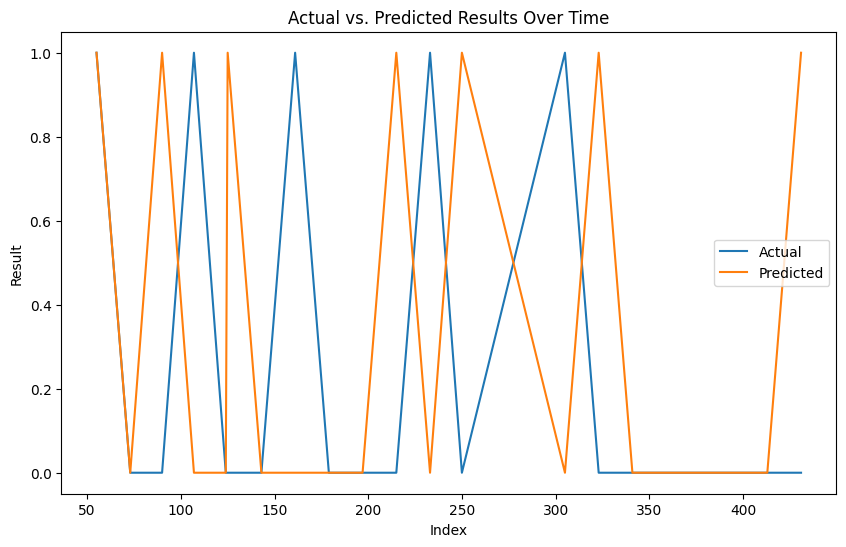

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(combined.index, combined['actual'], label='Actual')
plt.plot(combined.index, combined['predicted'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Result')
plt.title('Actual vs. Predicted Results Over Time')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

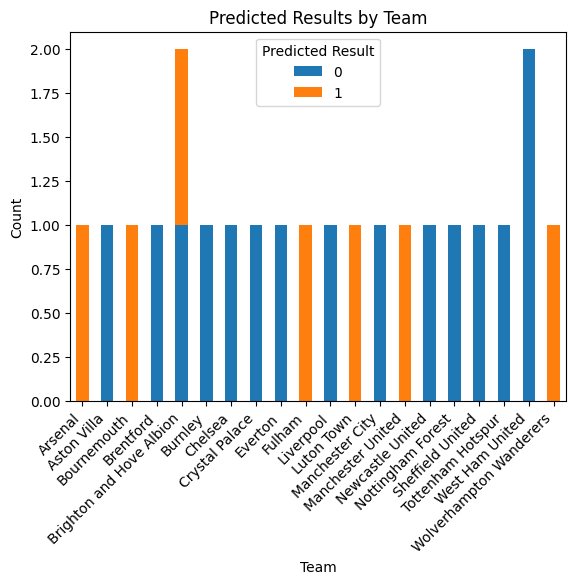

In [48]:
team_predictions = combined.groupby('team')['predicted'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
team_predictions.plot(kind='bar', stacked=True)
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Predicted Results by Team')
plt.legend(title='Predicted Result')
plt.show()

In [49]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"} 
mapping = MissingDict(**map_values)

In [50]:
combined["new_team"] = combined["team"].map(mapping)

In [51]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [52]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,1,1,2024-01-20,Arsenal,Crystal Palace,W,Arsenal,0,0,Crystal Palace,Arsenal,L,Crystal Palace
1,0,0,2024-01-14,Aston Villa,Everton,D,Aston Villa,0,0,Everton,Aston Villa,D,Everton
2,0,1,2024-01-21,Bournemouth,Liverpool,L,Bournemouth,1,0,Liverpool,Bournemouth,W,Liverpool
3,1,0,2024-01-20,Brentford,Nott'ham Forest,W,Brentford,0,0,Nottingham Forest,Brentford,L,Nottingham Forest
4,0,0,2024-01-02,Brighton and Hove Albion,West Ham,D,Brighton,0,0,West Ham United,Brighton,D,West Ham
5,0,1,2024-01-22,Brighton and Hove Albion,Wolves,D,Brighton,0,1,Wolverhampton Wanderers,Brighton,D,Wolves
6,0,0,2024-01-12,Burnley,Luton Town,D,Burnley,0,1,Luton Town,Burnley,D,Luton Town
7,1,0,2024-01-13,Chelsea,Fulham,W,Chelsea,0,1,Fulham,Chelsea,L,Fulham
8,0,0,2024-01-20,Crystal Palace,Arsenal,L,Crystal Palace,1,1,Arsenal,Crystal Palace,W,Arsenal
9,0,0,2024-01-14,Everton,Aston Villa,D,Everton,0,0,Aston Villa,Everton,D,Aston Villa


In [53]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()


0    4
1    1
Name: actual_x, dtype: int64

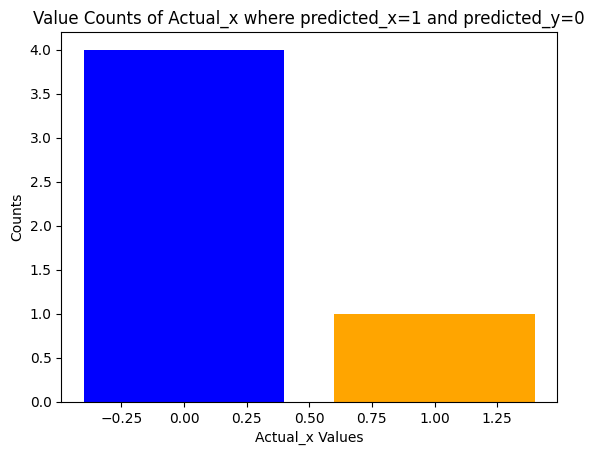

In [56]:
value_counts = {0: 4, 1: 1}

labels = list(value_counts.keys())
counts = list(value_counts.values())

plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Actual_x Values')
plt.ylabel('Counts')
plt.title('Value Counts of Actual_x where predicted_x=1 and predicted_y=0')
plt.show()